**Table of contents**<a id='toc0_'></a>    
- [Missing Values](#toc1_)    
- [Decision metrics](#toc2_)    
- [Source Page Metrics](#toc3_)    
- [Disclosed indicators](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
llama2 = pd.read_excel('./data/hm_llama2_topk8_paramsall.xlsx')
llama2.drop(["Unnamed: 0"], axis=1, inplace=True)

llama3 = pd.read_excel('./data/hm_llama3_instruct_topk8_paramsall.xlsx')
llama3.drop(["Unnamed: 0"], axis=1, inplace=True)

mistral = pd.read_excel('./data/hm_mistral_topk8_paramsall.xlsx')
mistral.drop(["Unnamed: 0"], axis=1, inplace=True)

phi3 = pd.read_excel('./data/hm_phi3_14b-instruct_topk8_paramsall.xlsx')
phi3.drop(["Unnamed: 0"], axis=1, inplace=True)

# <a id='toc1_'></a>[Missing Values](#toc0_)

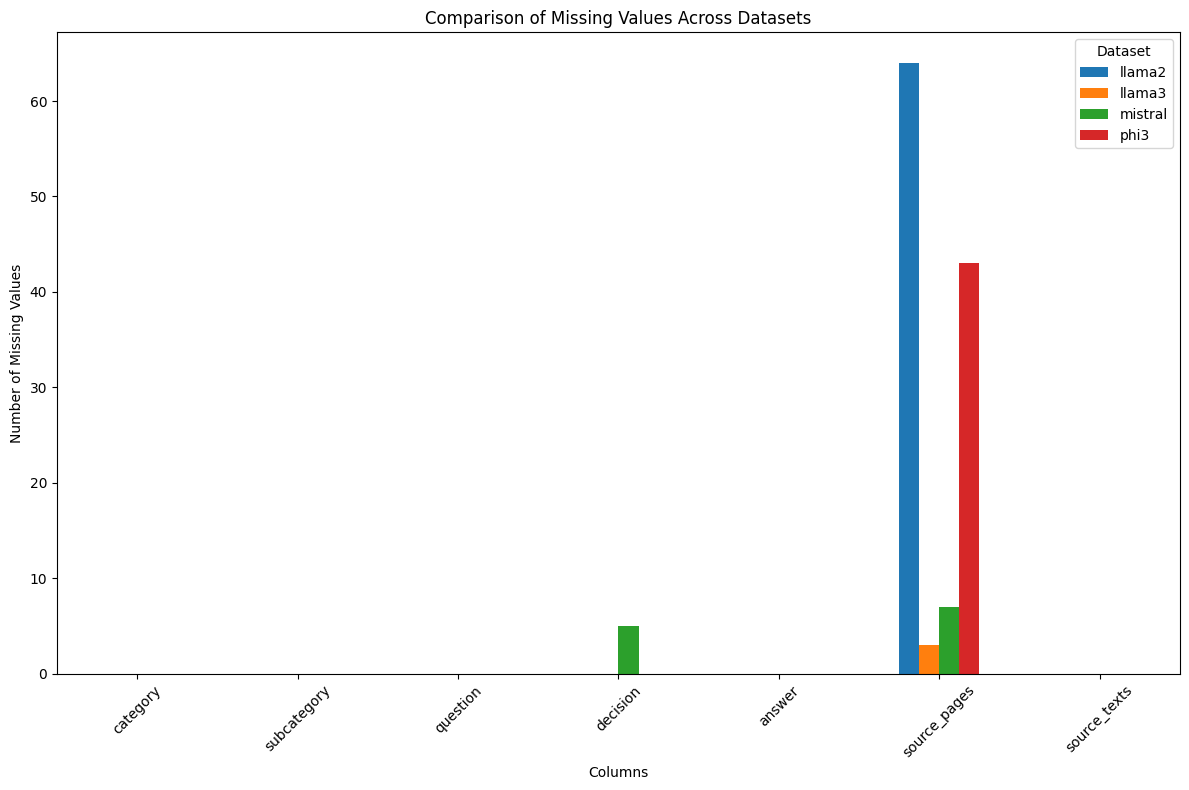

In [44]:
llama2_missing = llama2.isna().sum()
llama3_missing = llama3.isna().sum()
mistral_missing = mistral.isna().sum()
phi3_missing = phi3.isna().sum()

missing_comparison = pd.DataFrame({
    'llama2': llama2_missing,
    'llama3': llama3_missing,
    'mistral': mistral_missing,
    'phi3': phi3_missing
}).reset_index()

missing_comparison.columns = ['Column', 'llama2', 'llama3', 'mistral', 'phi3']

missing_comparison.plot(x='Column', kind='bar', figsize=(12, 8))
plt.title('Comparison of Missing Values Across Datasets')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

llama2 fails to give a single source page

# <a id='toc2_'></a>[Decision metrics](#toc0_)

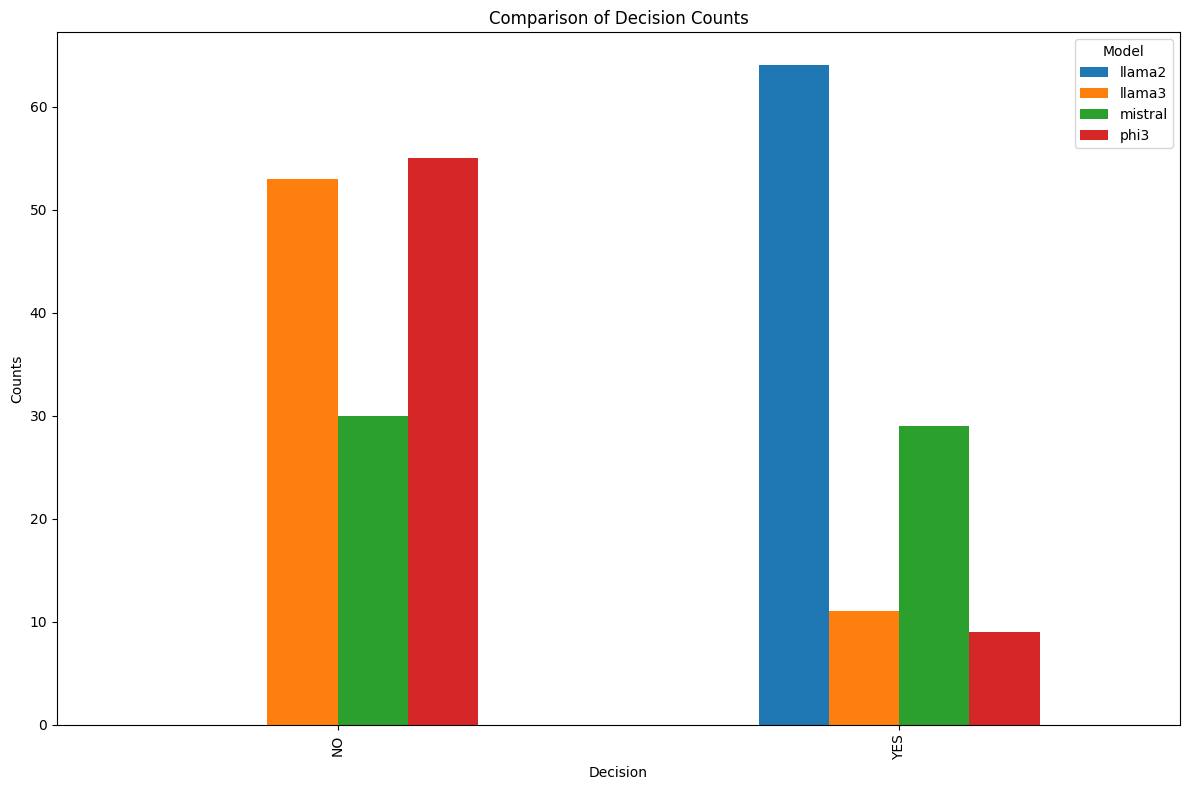

In [45]:
llama2_decision_counts = llama2['decision'].value_counts()
llama3_decision_counts = llama3['decision'].value_counts()
mistral_decision_counts = mistral['decision'].value_counts()
phi3_decision_counts = phi3['decision'].value_counts()

decision_comparison_df = pd.DataFrame({
    'llama2': llama2_decision_counts,
    'llama3': llama3_decision_counts,
    'mistral': mistral_decision_counts,
    'phi3': phi3_decision_counts
})

decision_comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Decision Counts')
plt.xlabel('Decision')
plt.ylabel('Counts')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [57]:
mistral_missing_indices = mistral[mistral['decision'].isna()].index.tolist()
print("Indices of missing decisions in mistral:", mistral_missing_indices)
mistral_missing_entries = mistral.loc[mistral_missing_indices]
mistral_missing_entries.head(5)

Indices of missing decisions in mistral: [1, 10, 11, 16, 45]


,category,subcategory,question,decision,answer,source_pages,source_texts
1,target,headline,If the company communicates GHG emission inten...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 16: Until this wor...
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: No new or amen...
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: The contracts ...
16,governance,accountability,Does the company report how its board oversees...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 38: In addition, a..."
45,tracking,emissions,Does the company report its scope 1 GHG emissi...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."


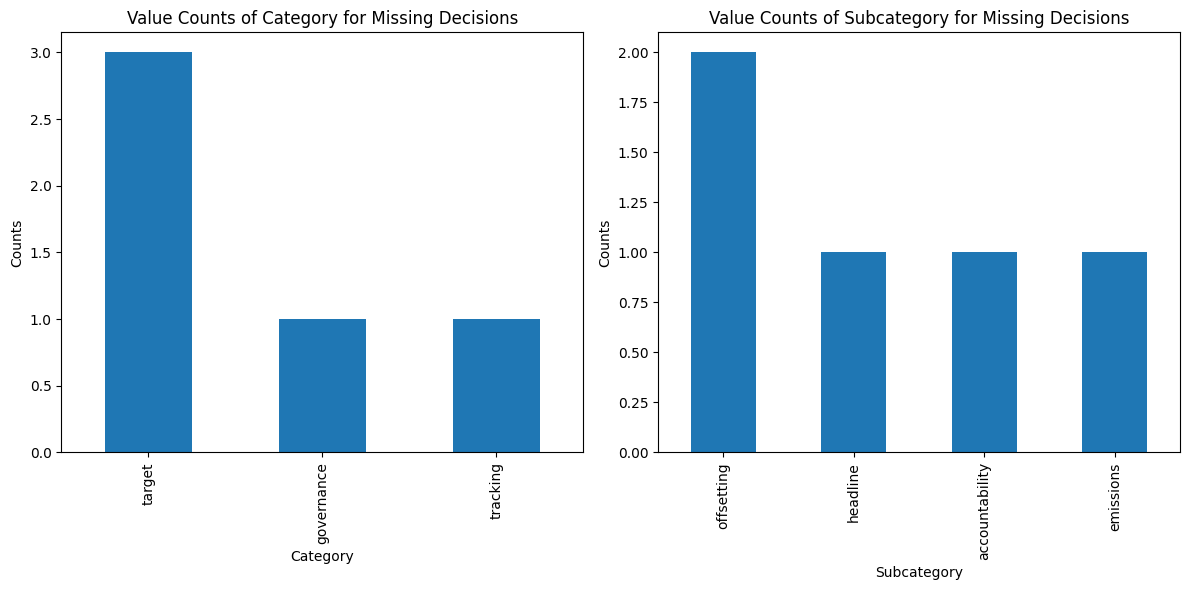

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral_missing_entries['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral_missing_entries['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc3_'></a>[Source Page Metrics](#toc0_)

In [48]:
llama3_missing_source = llama3[llama3["source_pages"].isna()].index
mistral_missing_source = mistral[mistral["source_pages"].isna()].index
phi3_missing_source = phi3[phi3["source_pages"].isna()].index

In [49]:
print(f"# missing source page entries for llama3: {len(llama3_missing_source)}")
print(f"# missing source page entries for mistral: {len(mistral_missing_source)}")
print(f"# missing source page entries for phi3: {len(phi3_missing_source)}")

# missing source page entries for llama3: 3
# missing source page entries for mistral: 7
# missing source page entries for phi3: 43


In [50]:
llama3.iloc[llama3_missing_source].sample(3)

,category,subcategory,question,decision,answer,source_pages,source_texts
26,strategy,production,Does the company report a strategy and activit...,NO,"Upon reviewing the report, I did not find spec...",NaN,[BEGIN OF SOURCES]\n\nPAGE 40: —Innovation : ...
7,target,coverage,Does the company report its absolute emission ...,NO,The company reports a combined target for scop...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."
32,strategy,engagement,Does the company report a strategy with specif...,NO,The company does not report a specific strateg...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...


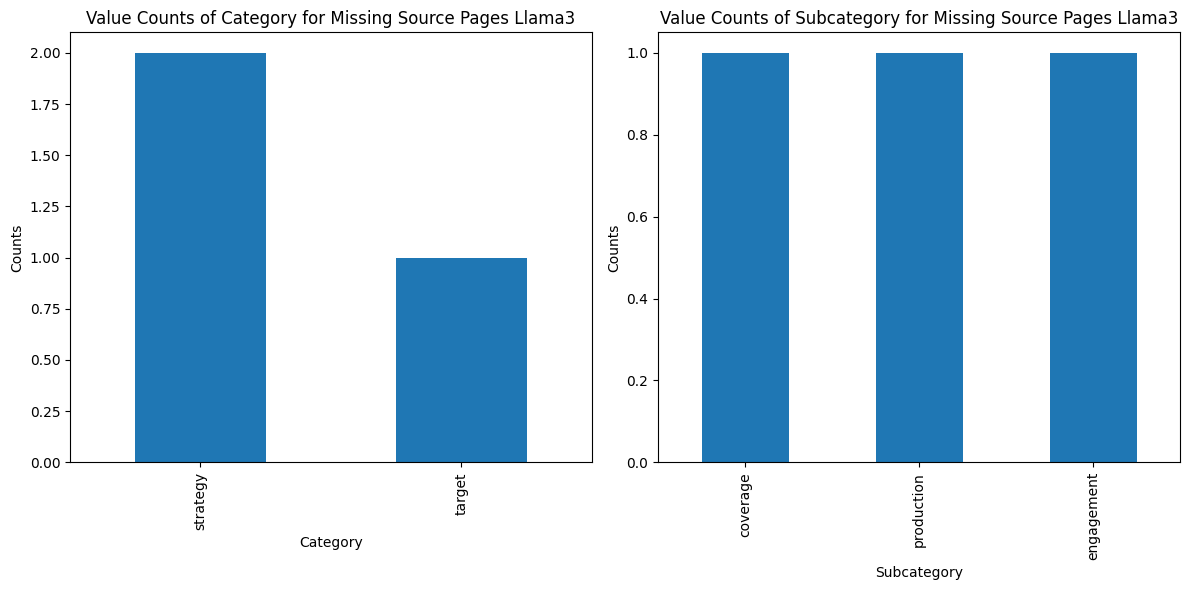

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
llama3.iloc[llama3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Llama3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
llama3.iloc[llama3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Llama3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [51]:
mistral.iloc[mistral_missing_source].sample(7)

,category,subcategory,question,decision,answer,source_pages,source_texts
45,tracking,emissions,Does the company report its scope 1 GHG emissi...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."
35,strategy,engagement,Does the company report serious consequences a...,NO,The report does not provide specific informati...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...
1,target,headline,If the company communicates GHG emission inten...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 16: Until this wor...
37,strategy,fossil fuels,Does the company report a strategy and activit...,NO,The report does not provide evidence of a comm...,NaN,[BEGIN OF SOURCES]\n\nPAGE 22: We used prefer...
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: No new or amen...
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: The contracts ...
16,governance,accountability,Does the company report how its board oversees...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 38: In addition, a..."


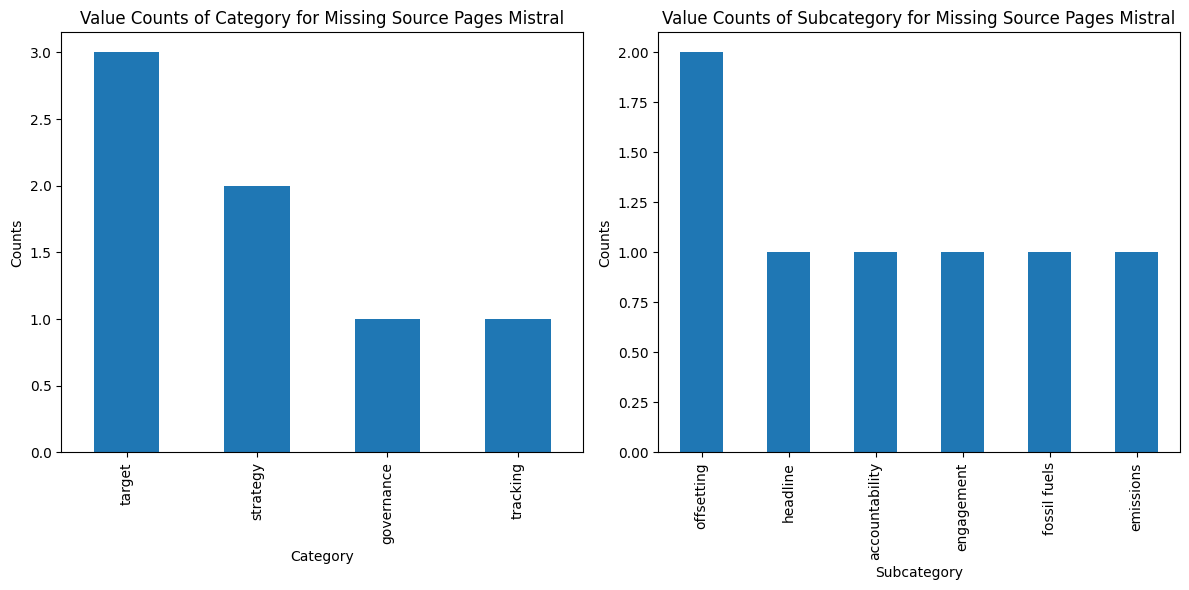

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral.iloc[mistral_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Mistral')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral.iloc[mistral_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Mistral')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [52]:
phi3.iloc[phi3_missing_source].sample(10)

,category,subcategory,question,decision,answer,source_pages,source_texts
50,tracking,progress,Does the company report its absolute scope 1 G...,NO,The provided sources do not contain specific q...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."
56,tracking,progress,Does the company report the specific drivers a...,NO,The company's report does mention efforts and ...,NaN,[BEGIN OF SOURCES]\n\nPAGE 20: We focus on se...
27,strategy,planning,Does the company report its opex planning to e...,NO,The provided sources do not contain specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 39: An innovative ...
55,tracking,progress,Does the company report a decline in its scope...,NO,The provided sources do not provide specific q...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: –Our absolute ...
30,strategy,planning,Does the company report its strategy and activ...,NO,The provided sources do not contain specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...
60,tracking,revenues,Does the company report the amount of climate ...,NO,The company's report does not provide specific...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...
54,tracking,progress,Does the company report a decline in its scope...,NO,The provided sources do not contain specific q...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: –Our absolute ...
28,strategy,planning,Does the company report its capex planning to ...,NO,The provided sources do not contain specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 39: An innovative ...
39,strategy,just transition,Does the company report a strategy for a just...,NO,The provided sources do not contain specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...
1,target,headline,If the company communicates GHG emission inten...,NO,The company does communicate GHG emission inte...,NaN,[BEGIN OF SOURCES]\n\nPAGE 16: Until this wor...


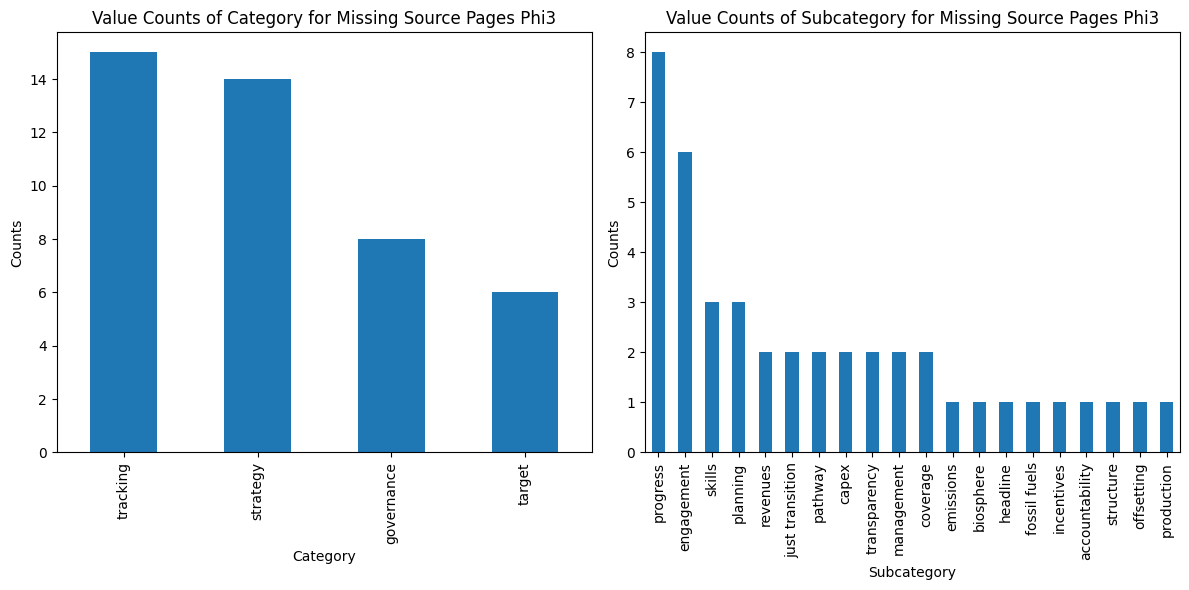

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
phi3.iloc[phi3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Phi3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
phi3.iloc[phi3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Phi3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [53]:
overlap_all = set(llama3_missing_source).intersection(set(mistral_missing_source), set(phi3_missing_source))
overlap_llama3_mistral = set(llama3_missing_source).intersection(set(mistral_missing_source))
overlap_llama3_phi3 = set(llama3_missing_source).intersection(set(phi3_missing_source))
overlap_mistral_phi3 = set(mistral_missing_source).intersection(set(phi3_missing_source))

print("Values overlapping in all three lists:", overlap_all)
print("Values overlapping between llama3 and mistral:", overlap_llama3_mistral)
print("Values overlapping between llama3 and phi3:", overlap_llama3_phi3)
print("Values overlapping between mistral and phi3:", overlap_mistral_phi3)

Values overlapping in all three lists: set()
Values overlapping between llama3 and mistral: set()
Values overlapping between llama3 and phi3: {32, 26}
Values overlapping between mistral and phi3: {1, 10, 35, 37}


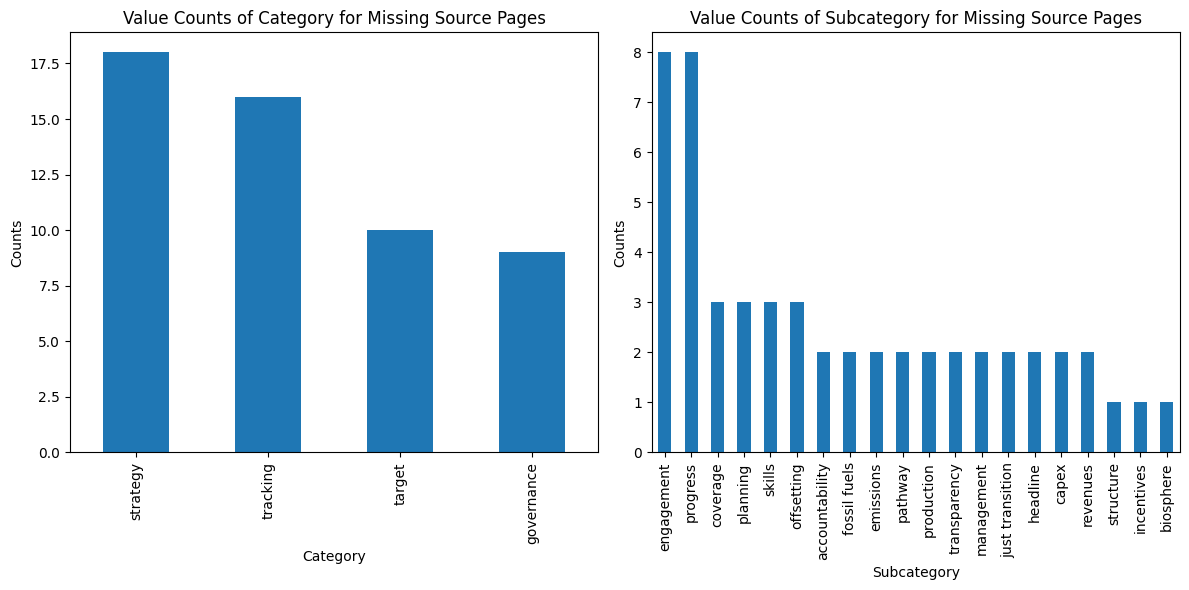

In [ ]:
concatenated_missing_source_page = pd.concat([llama3.iloc[llama3_missing_source], mistral.iloc[mistral_missing_source], phi3.iloc[phi3_missing_source]], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
concatenated_missing_source_page['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
concatenated_missing_source_page['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc4_'></a>[Disclosed indicators](#toc0_)

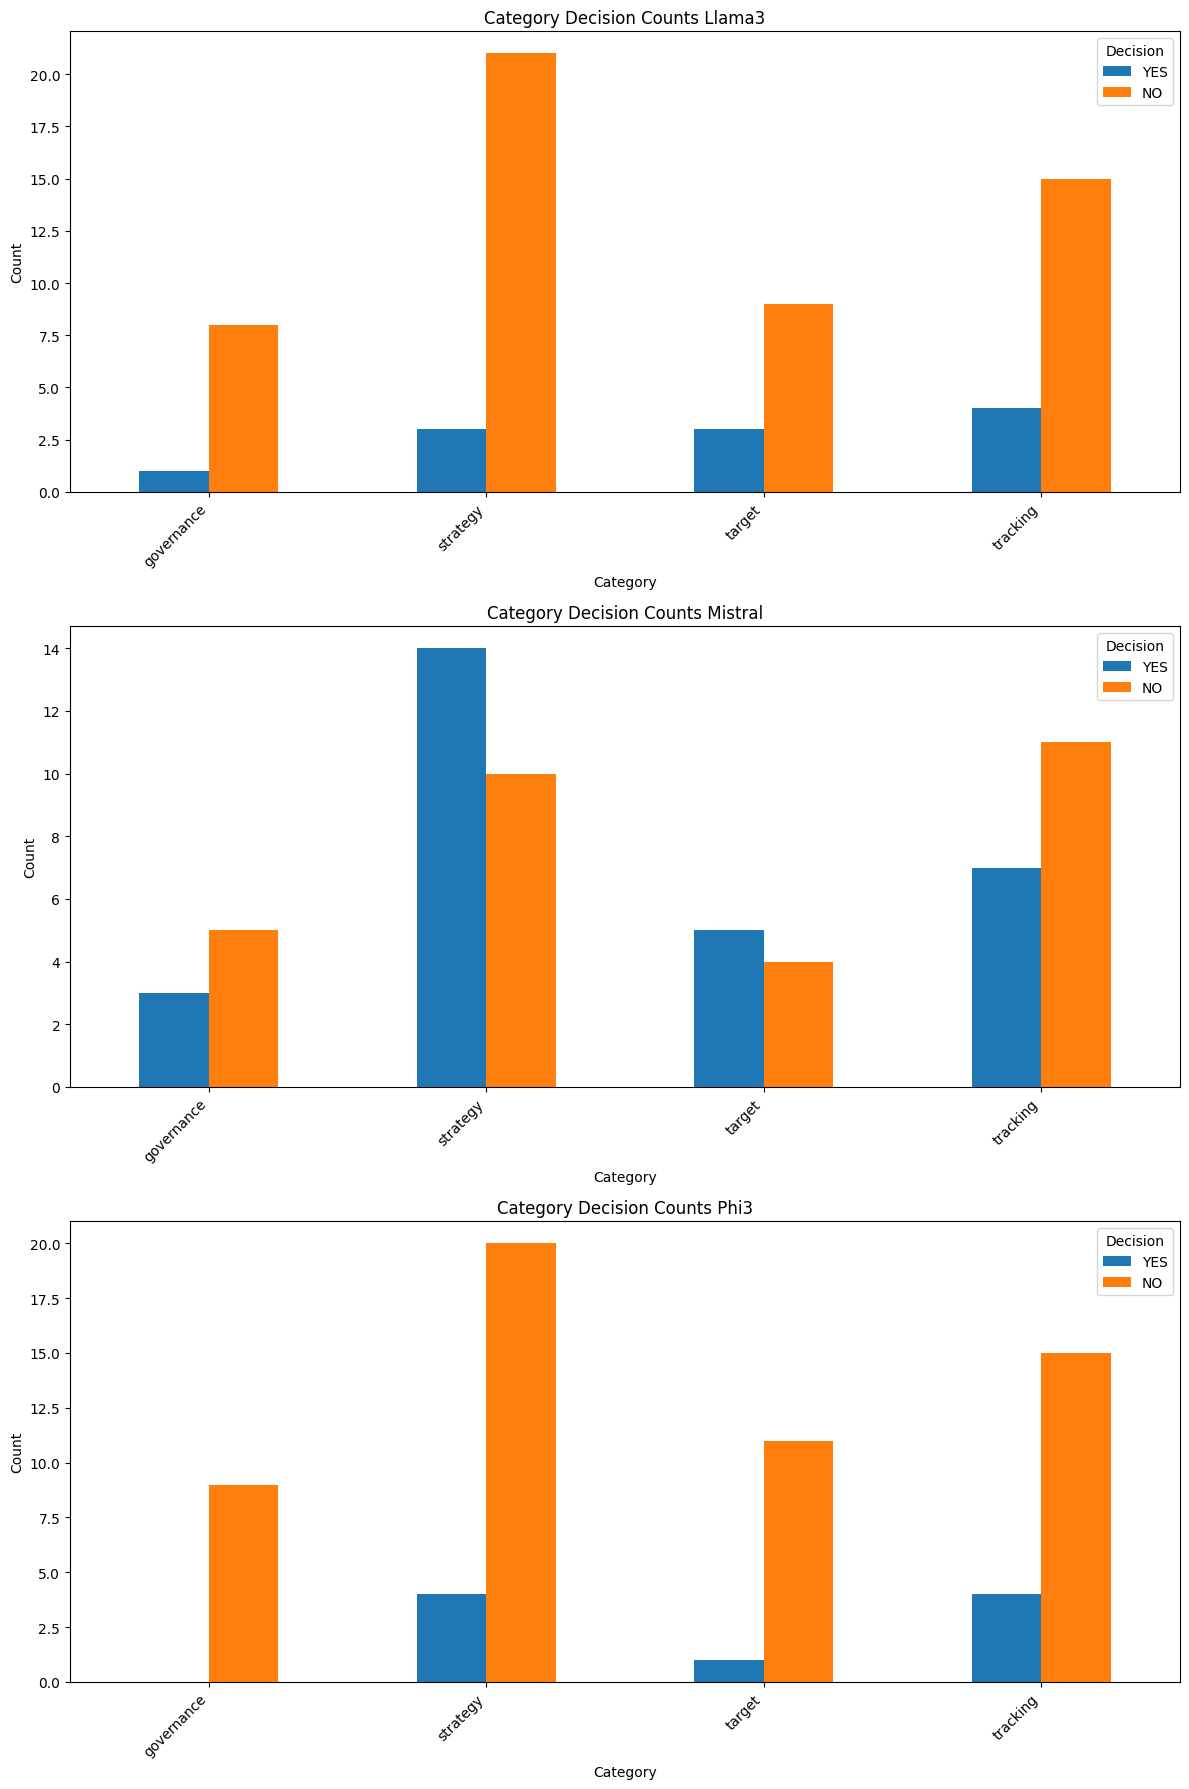

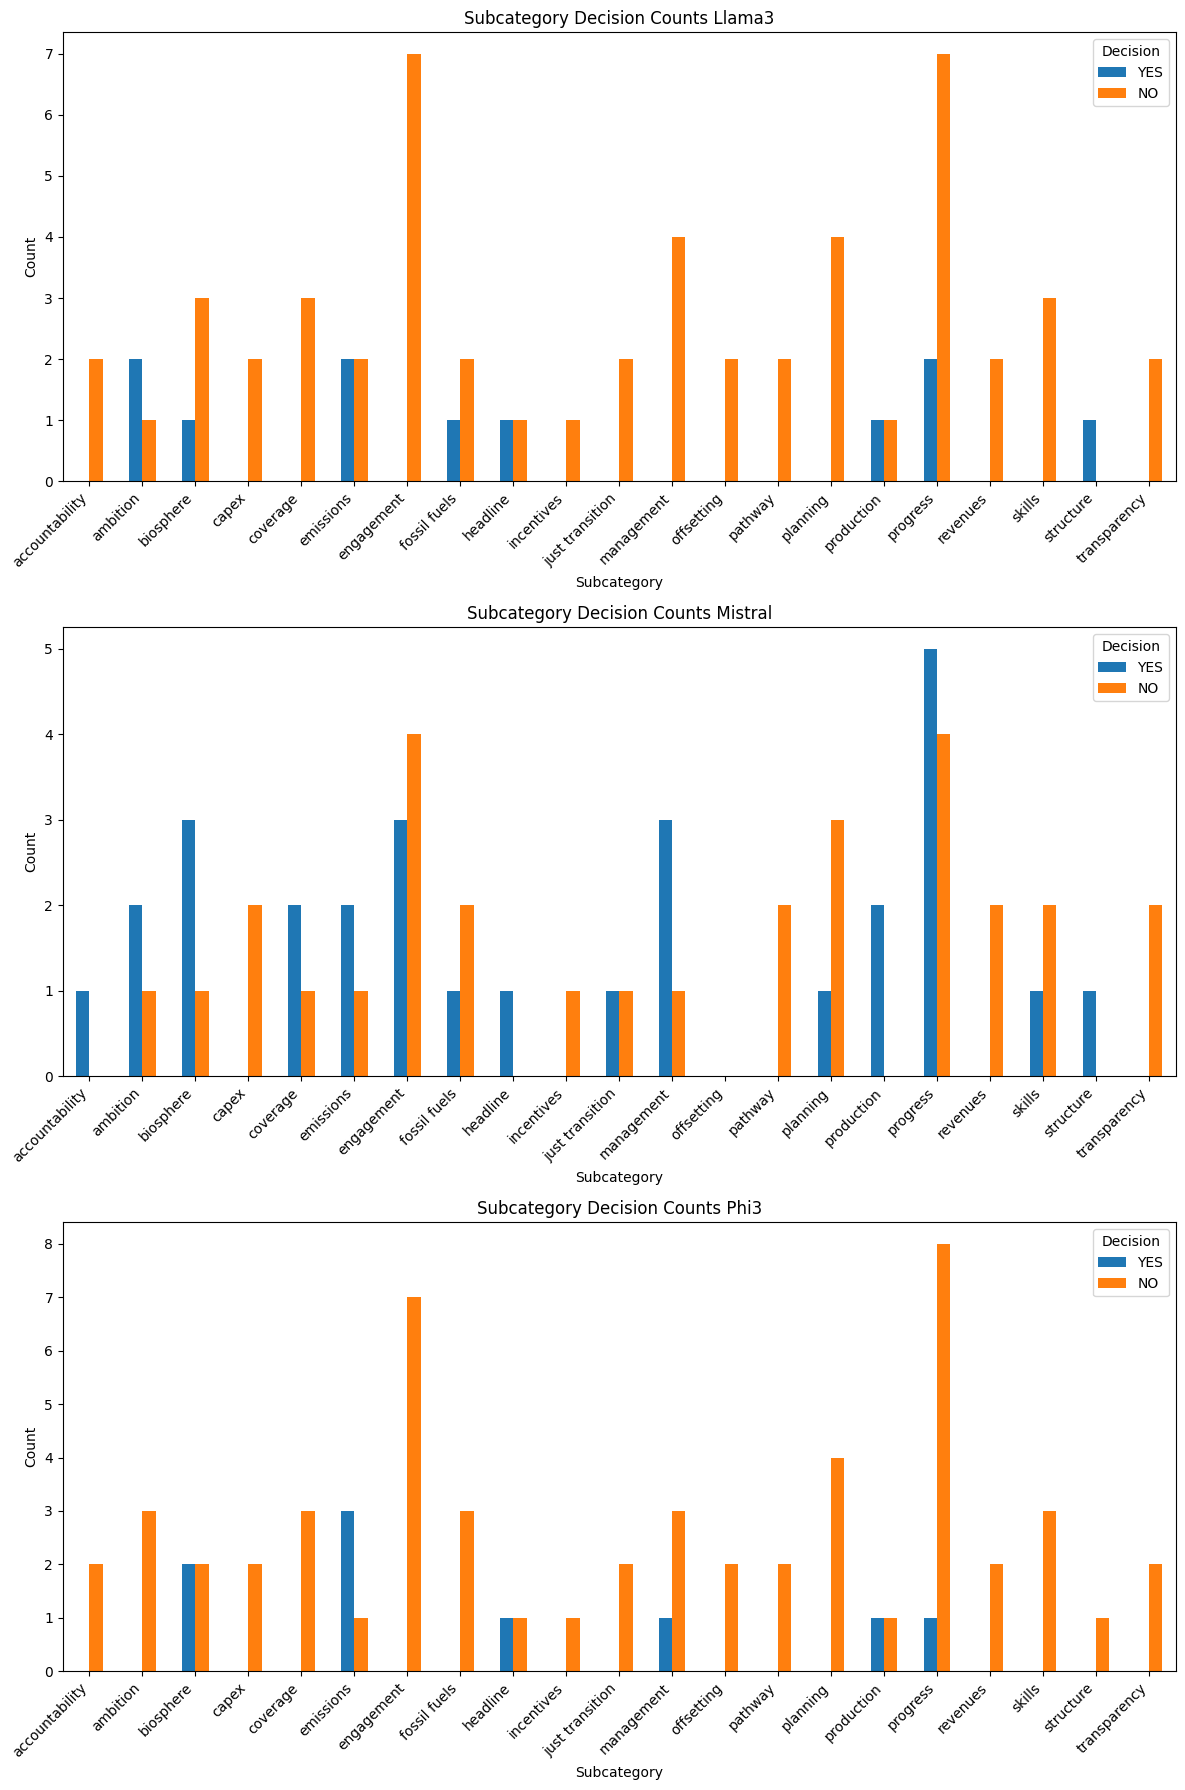

In [55]:
def plot_counts(data, title, ax, column_name, order):
    yes_counts = data[[column_name, "decision"]][data["decision"] == "YES"][column_name].value_counts()
    no_counts = data[[column_name, "decision"]][data["decision"] == "NO"][column_name].value_counts()

    counts_df = pd.DataFrame({
        "YES": yes_counts,
        "NO": no_counts
    })

    counts_df = counts_df.reindex(order)

    counts_df.plot(kind="bar", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column_name.capitalize())
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(order, rotation=45, ha="right")
    ax.legend(title="Decision")

all_categories = sorted(llama3["category"].unique())
all_subcategories = sorted(llama3["subcategory"].unique())

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
plot_counts(llama3, "Category Decision Counts Llama3", axes[0], "category", all_categories)
plot_counts(mistral, "Category Decision Counts Mistral", axes[1], "category", all_categories)
plot_counts(phi3, "Category Decision Counts Phi3", axes[2], "category", all_categories)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
plot_counts(llama3, "Subcategory Decision Counts Llama3", axes[0], "subcategory", all_subcategories)
plot_counts(mistral, "Subcategory Decision Counts Mistral", axes[1], "subcategory", all_subcategories)
plot_counts(phi3, "Subcategory Decision Counts Phi3", axes[2], "subcategory", all_subcategories)
plt.tight_layout()
plt.show()